In [18]:
from google.colab import files

uploaded = files.upload()


Saving Raw_data(Road_Accident).csv to Raw_data(Road_Accident) (1).csv


In [19]:
## Importing Pandas
import pandas as pd

## Loading the file
df = pd.read_csv('Raw_data(Road_Accident).csv')

## Looking at the first 5 rows
df.head(100)

,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
0,165433,Connecticut,2024-02-20 05:46:20,Tuesday,19:59:02,Rainy,Muddy,Daylight,Street,T-Junction,...,2,3,57.0,3.303606,3.139351,485.649011,4.886202,0.904971,45.0,25.152781
1,165434,Massachusetts,2024-01-09 05:08:31,Wednesday,21:28:51,Sunny,Muddy,Daylight,Highway,Intersection,...,1,0,55.0,2.715327,3.634593,616.979936,4.677592,0.949236,41.0,23.163817
2,165435,Wyoming,2024-02-20 08:26:27,Thursday,18:04:26,Snowy,Snowy,Dawn,Street,Underpass,...,3,1,38.0,4.811429,9.631561,838.741654,9.926058,0.184447,64.0,6.697750
3,165436,Hawaii,2024-01-15 03:23:47,Sunday,16:51:02,Snowy,Icy,Daylight,Street,Intersection,...,5,0,59.0,6.976968,2.334468,842.441019,4.351822,0.195811,NaN,6.595036
4,165437,Oklahoma,2024-02-10 10:17:29,Tuesday,14:19:19,Foggy,Icy,Night,Rural,T-Junction,...,2,0,53.0,3.724599,4.359620,905.620262,6.626862,0.954821,81.0,22.913128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,165528,California,2024-02-12 04:14:13,Friday,13:29:14,Foggy,Snowy,Daylight,Freeway,Crossroads,...,1,1,63.0,7.831228,6.004298,972.554251,5.578940,0.216830,42.0,10.820160
96,165529,Missouri,2024-01-16 01:22:48,Tuesday,06:34:08,Rainy,Muddy,Dusk,Freeway,Intersection,...,1,1,53.0,6.774471,0.978380,248.824533,4.203826,0.901195,39.0,21.500768
97,165530,Washington,2024-01-02 15:54:41,Wednesday,15:56:35,Sunny,Icy,Dusk,Rural,T-Junction,...,5,1,36.0,6.026846,6.302802,591.894546,3.361014,0.682363,94.0,27.746879
98,165531,North Carolina,2024-02-16 05:58:26,Wednesday,09:58:54,Snowy,Icy,Night,Highway,Roundabout,...,2,0,55.0,3.661664,6.543546,769.169105,7.888448,0.476637,2.0,13.155790


In [20]:
Max_Speed = df['Vehicle_Speed'].max()
print(Max_Speed)

100.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1610 non-null   int64  
 1   State                               1610 non-null   object 
 2   Date                                1610 non-null   object 
 3   Day_of_Week                         1610 non-null   object 
 4   Time_of_Day                         1610 non-null   object 
 5   Weather_Conditions                  1461 non-null   object 
 6   Road_Conditions                     1610 non-null   object 
 7   Light_Conditions                    1610 non-null   object 
 8   Type_of_Road                        1610 non-null   object 
 9   Type_of_Junction                    1455 non-null   object 
 10  Type_of_Accident                    1610 non-null   object 
 11  Vehicle_Type                        1610 no

In [22]:
df.isna().sum()

,0
ID,0
State,0
Date,0
Day_of_Week,0
Time_of_Day,0
Weather_Conditions,149
Road_Conditions,0
Light_Conditions,0
Type_of_Road,0
Type_of_Junction,155


In [23]:
## In my data there are missing values in Weather_Conditions, Type_of_Junction, Speed_Limit, Road_width, Vehicle_Speed, And Taken_for_Emergency_Response.

In [ ]:
### Noticed Categorical Columns with Nan.


"""
For the Weather_Conditions and Type_of_Junction columns, I addressed missing values by labeling them as 'Unknown'.

In categorical data, filling missing spots with the most common value (the Mode) can accidentally 'over-represent' certain conditions (like Sunny weather). By using 'Unknown,' I avoid introducing bias into the safety analysis.

This ensures that functions like value_counts() and Seaborn plots do not skip over missing entries, providing a more honest look at the total sample size.
"""

In [24]:
## Let's Fill the Categorical Columns with "Unknown"
## Columns Weather_Condition and Type_of_junction has categorical value.

## Fixing Categorical Missing Values
df['Weather_Conditions'] = df['Weather_Conditions'].fillna('Unknown')
df['Type_of_Junction'] = df['Type_of_Junction'].fillna('Unknown')

In [25]:
## Checking if these Columns were replaced with"UnKnown"

df.sample(60) ## it prints a mix of data.

,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
538,165971,Colorado,2024-02-05 00:46:49,Thursday,04:07:12,Sunny,Muddy,Dusk,Urban,Roundabout,...,5,0,56.0,8.614162,3.402111,305.113177,6.448468,0.206770,58.0,21.895106
1501,166934,Ohio,2024-02-20 00:20:34,Wednesday,16:00:47,Snowy,Dry,Night,Urban,Roundabout,...,2,0,31.0,1.360197,6.648284,144.935263,7.680718,0.247791,43.0,24.937596
427,165860,Connecticut,2024-02-22 17:22:55,Wednesday,20:32:18,Rainy,Icy,Dawn,Street,Roundabout,...,3,3,60.0,0.959169,6.343480,738.801006,6.108422,0.268028,85.0,13.549526
1331,166764,Iowa,2024-02-07 04:46:03,Tuesday,22:22:11,Sunny,Snowy,Night,Rural,Roundabout,...,3,0,70.0,6.280455,2.510826,911.295035,8.981379,0.159276,NaN,27.598124
617,166050,South Carolina,2024-01-01 12:31:04,Saturday,23:54:29,Stormy,Dry,Dawn,Highway,T-Junction,...,1,1,61.0,8.251660,8.092584,384.984222,8.034913,0.613388,31.0,25.744721
1088,166521,Missouri,2024-02-21 14:17:09,Saturday,08:40:54,Sunny,Icy,Night,Freeway,Crossroads,...,4,3,44.0,5.575380,4.759881,848.827571,9.893246,0.143040,28.0,23.395506
1243,166676,Hawaii,2024-02-21 23:28:42,Wednesday,14:02:57,Stormy,Dry,Dawn,Freeway,T-Junction,...,4,0,49.0,0.272101,8.366848,770.988107,8.492670,0.141624,42.0,24.639873
815,166248,Idaho,2024-01-07 10:21:35,Sunday,04:50:31,Rainy,Wet,Night,Rural,Overpass,...,2,3,40.0,9.802069,9.785441,647.576450,8.132288,0.352064,16.0,19.899697
1020,166453,Massachusetts,2024-01-12 17:39:38,Wednesday,22:29:07,Foggy,Wet,Dusk,Freeway,Crossroads,...,2,0,50.0,0.487829,5.102664,133.473578,5.949751,0.679347,0.0,NaN
608,166041,Mississippi,2024-01-31 01:27:18,Saturday,16:27:34,Stormy,Wet,Night,Street,Unknown,...,2,3,62.0,0.764535,7.900276,450.714947,4.057198,0.169325,NaN,8.857404


In [46]:
### Noticed on Speed_Limit

"""
I addressed missing values in the Speed_Limit column by calculating and applying the Median. Unlike the Mean, which can result in non-existent speed limits (e.g., 47.5 mph), the Median ensures that the missing values are filled with a standard, realistic speed limit found elsewhere in the dataset.

"""

SyntaxError: incomplete input (ipython-input-969763094.py, line 1)

In [26]:
## Fixing Numerical Missing Value

Median_Value = df['Speed_Limit'].median()
print(Median_Value)

## Taking the empty cell of Speed Limit with median value.
df['Speed_Limit'] = df['Speed_Limit'].fillna(Median_Value)

## To check if the cell is filled with a mix of data.
df.sample(60)

50.0


,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
706,166139,Kansas,2024-02-12 13:09:54,Friday,12:37:59,Unknown,Dry,Dawn,Urban,T-Junction,...,4,1,59.0,7.473275,1.838082,223.871763,7.008062,0.591257,0.0,17.355929
1597,167030,Illinois,2024-01-26 17:33:03,Thursday,05:50:06,Sunny,Muddy,Night,Urban,Overpass,...,4,2,35.0,0.731941,5.232640,161.840800,5.934939,0.984629,59.0,28.092378
1219,166652,South Carolina,2024-01-26 13:26:20,Sunday,04:08:15,Snowy,Muddy,Daylight,Freeway,T-Junction,...,2,0,42.0,8.290592,3.326035,891.060402,5.667014,0.479921,71.0,NaN
1220,166653,South Dakota,2024-02-08 06:49:37,Sunday,00:08:21,Unknown,Muddy,Dawn,Freeway,Overpass,...,3,3,49.0,1.288252,7.293010,587.007243,8.084633,0.865652,47.0,18.079957
1423,166856,Indiana,2024-01-22 06:16:03,Saturday,17:24:12,Sunny,Dry,Night,Street,Roundabout,...,2,3,70.0,4.274177,9.107883,935.610923,4.433875,0.807681,52.0,23.077629
1154,166587,Alabama,2024-01-13 02:33:35,Saturday,07:54:44,Stormy,Snowy,Night,Freeway,Overpass,...,5,3,66.0,3.619033,3.955905,769.103250,NaN,0.141583,3.0,11.667330
1094,166527,Kentucky,2024-01-28 20:55:52,Monday,04:44:36,Unknown,Icy,Night,Rural,Crossroads,...,4,3,54.0,0.143640,4.476721,243.239577,3.920945,0.998056,73.0,5.293709
977,166410,Alabama,2024-02-26 17:16:21,Sunday,05:02:22,Snowy,Wet,Dusk,Rural,Intersection,...,2,0,64.0,3.401192,8.985827,117.090388,8.119572,0.809995,NaN,16.050603
239,165672,Colorado,2024-01-26 00:31:41,Sunday,13:58:49,Sunny,Wet,Night,Freeway,Overpass,...,3,2,34.0,9.176211,7.763625,771.238775,8.289158,0.410023,85.0,18.980649
1306,166739,Rhode Island,2024-02-11 04:49:42,Wednesday,08:21:37,Foggy,Wet,Night,Urban,Underpass,...,2,1,65.0,8.033425,9.100408,673.098006,4.150788,0.842858,10.0,17.109858


In [45]:
## Discovery

"""
The Road_Width column contained several missing values. So,
I chose to impute the Median because road infrastructure is typically standardized. Using the median prevents a few exceptionally wide multi-lane highways or very narrow alleys from skewing the 'typical' road width in the dataset.

"""

'\n\n\n\n'

In [27]:
## For Columns Road_Width

Median_Value = df['Road_Width'].median()
print(Median_Value)


## filling the empty cell with median value.
df['Road_Width'] = df['Road_Width'].fillna(Median_Value)


## Checking a mix of data if the empty cell is filled with a median value.
df.sample(60)


6.6231986


,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
381,165814,Kentucky,2024-01-12 03:51:24,Tuesday,02:52:44,Stormy,Icy,Dawn,Rural,Roundabout,...,1,3,55.0,4.132230,6.899916,174.104458,8.027317,0.653377,17.0,20.815506
1078,166511,North Dakota,2024-01-29 17:21:00,Friday,17:28:12,Rainy,Icy,Daylight,Urban,Underpass,...,2,2,64.0,1.817068,7.111599,330.532743,3.631220,0.121368,22.0,6.257356
2,165435,Wyoming,2024-02-20 08:26:27,Thursday,18:04:26,Snowy,Snowy,Dawn,Street,Underpass,...,3,1,38.0,4.811429,9.631561,838.741654,9.926058,0.184447,64.0,6.697750
611,166044,Montana,2024-01-20 02:26:49,Sunday,03:04:35,Unknown,Dry,Daylight,Rural,Underpass,...,3,0,67.0,5.320729,3.506857,909.925834,6.888850,0.995481,99.0,14.601820
389,165822,Wyoming,2024-01-13 04:36:41,Saturday,21:03:41,Foggy,Snowy,Daylight,Highway,Underpass,...,3,0,34.0,2.959637,7.168799,701.853710,9.610132,0.350498,NaN,18.997476
1112,166545,Oklahoma,2024-02-07 17:51:26,Tuesday,12:59:39,Rainy,Muddy,Night,Urban,Underpass,...,5,2,32.0,2.828748,6.382417,911.282957,6.623199,0.161662,0.0,20.070448
447,165880,Texas,2024-02-08 00:49:06,Tuesday,21:10:22,Rainy,Dry,Night,Rural,Underpass,...,2,0,46.0,1.189869,1.490198,262.918467,8.466000,0.446109,79.0,11.983299
324,165757,Mississippi,2024-02-27 21:02:00,Thursday,23:25:26,Stormy,Wet,Dusk,Highway,Crossroads,...,3,0,54.0,0.860751,1.938556,922.303278,6.155430,0.747512,1.0,18.679238
1543,166976,Nevada,2024-01-10 07:05:24,Thursday,15:14:51,Stormy,Icy,Dawn,Freeway,Intersection,...,5,2,67.0,8.619681,6.734142,125.464559,6.294169,0.749655,83.0,13.730862
1158,166591,Georgia,2024-02-28 09:07:09,Friday,08:41:36,Rainy,Icy,Dusk,Urban,Intersection,...,5,3,46.0,2.803090,5.265012,738.119519,6.623199,0.340335,NaN,25.851505


In [ ]:
## Notices

"""
I noticed that that are more than 170+ missing rows in vehicle_speed. I addressed missing entries in the Vehicle_Speed column by imputing the Median.


Why Median not mean?
In accident data, vehicle speeds can be highly 'skewed' (for example, many accidents at low city speeds and a few at very high highway speeds). The Median is a robust statistic, meaning it isn't easily influenced by those extreme high-speed crashes.

By filling these gaps instead of dropping the rows, I maintained the integrity of the dataset for geographic and categorical analysis.

"""

In [28]:
## For Columns 'Vehicle_Speed'

## Calculating  Median
Median_Value = df['Vehicle_Speed'].median()
print(Median_Value)

## Filling the empty cell with this Median_Value
df['Vehicle_Speed'] = df['Vehicle_Speed'].fillna(Median_Value)

## Printing random 60 row to check if the cells are filled or not
df.sample(60)

49.0


,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
1078,166511,North Dakota,2024-01-29 17:21:00,Friday,17:28:12,Rainy,Icy,Daylight,Urban,Underpass,...,2,2,64.0,1.817068,7.111599,330.532743,3.631220,0.121368,22.0,6.257356
356,165789,Ohio,2024-02-08 21:49:39,Tuesday,17:31:08,Foggy,Icy,Dusk,Highway,Underpass,...,4,3,58.0,9.342311,3.216075,805.406596,3.596624,0.473386,97.0,9.269169
203,165636,Louisiana,2024-01-10 07:44:55,Friday,17:26:27,Snowy,Snowy,Dawn,Rural,Crossroads,...,3,3,44.0,3.660329,4.826619,655.537373,6.104461,0.356633,95.0,23.155953
272,165705,Wyoming,2024-01-01 21:23:34,Thursday,04:46:31,Foggy,Snowy,Dawn,Highway,Underpass,...,1,1,62.0,5.909428,0.741534,242.395311,4.665573,0.262738,82.0,28.808839
447,165880,Texas,2024-02-08 00:49:06,Tuesday,21:10:22,Rainy,Dry,Night,Rural,Underpass,...,2,0,46.0,1.189869,1.490198,262.918467,8.466000,0.446109,79.0,11.983299
1119,166552,North Carolina,2024-01-13 02:53:04,Saturday,13:05:01,Foggy,Icy,Dusk,Highway,Underpass,...,3,0,36.0,9.644504,9.140524,324.618456,4.832597,0.171023,10.0,10.989256
1207,166640,Colorado,2024-01-28 13:50:51,Tuesday,04:09:55,Rainy,Icy,Dawn,Highway,Unknown,...,1,0,37.0,7.090567,6.426432,888.954316,4.074539,0.770719,83.0,15.329366
1540,166973,North Dakota,2024-02-17 08:35:50,Saturday,17:34:44,Rainy,Muddy,Dawn,Urban,Roundabout,...,5,1,70.0,5.527227,0.153531,924.458638,5.208594,0.422473,51.0,8.126420
887,166320,Alabama,2024-01-22 17:35:07,Saturday,16:12:10,Snowy,Wet,Dusk,Street,Underpass,...,5,0,45.0,0.693850,9.856346,774.364597,4.738493,0.107015,49.0,26.538927
977,166410,Alabama,2024-02-26 17:16:21,Sunday,05:02:22,Snowy,Wet,Dusk,Rural,Intersection,...,2,0,64.0,3.401192,8.985827,117.090388,8.119572,0.809995,49.0,16.050603


In [ ]:
## Discovery

"""
I identified 149+ missing rows within the Time_Taken_for_Emergency_Response column.I chose to impute the Median value rather than the Mean.

Why Median?
 Emergency response times often contain extreme 'outliers' (for example, an ambulance taking 2 hours due to a storm). A Mean would be pulled higher by these rare cases, whereas the Median represents the typical, 'middle-of-the-road' response time.

"""

In [29]:
## Let's Fix For Column 'Time_Taken_for_Emergency_Response'

## Calculating MEdian
Median_Value = df['Time_Taken_for_Emergency_Response'].median()
print(Median_Value)

## Filling the empty cell with this median value
df['Time_Taken_for_Emergency_Response'] = df['Time_Taken_for_Emergency_Response'].fillna(Median_Value)

## Printing random 60 row to check if the cells are filled or not
df.sample(60)

17.498543705


,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
69,165502,Maryland,2024-02-01 02:50:12,Wednesday,00:22:59,Unknown,Snowy,Dusk,Freeway,Roundabout,...,1,1,50.0,0.621179,7.510938,954.908163,7.372369,0.591060,49.0,18.467218
1252,166685,New York,2024-02-27 01:01:04,Thursday,03:42:41,Stormy,Dry,Dawn,Urban,Overpass,...,4,1,32.0,6.401870,2.006118,489.089692,8.265975,0.539884,48.0,8.462709
1425,166858,Pennsylvania,2024-02-12 06:55:09,Monday,06:01:39,Stormy,Snowy,Dawn,Freeway,Underpass,...,3,1,69.0,0.406188,3.130199,145.306432,7.578290,0.922500,85.0,17.498544
1509,166942,Montana,2024-01-29 13:03:26,Saturday,18:19:21,Unknown,Muddy,Dawn,Freeway,Crossroads,...,2,2,48.0,9.536479,7.405513,506.618675,5.835579,0.200621,39.0,10.986128
581,166014,Minnesota,2024-02-22 19:18:45,Monday,12:07:18,Snowy,Snowy,Daylight,Urban,Intersection,...,1,1,37.0,0.911244,9.895069,115.143926,6.675715,0.859978,49.0,12.441771
1372,166805,North Dakota,2024-01-07 23:58:34,Saturday,22:50:13,Sunny,Wet,Dusk,Freeway,Crossroads,...,1,0,47.0,7.275596,5.286449,948.386042,4.893250,0.322947,79.0,8.905183
155,165588,Connecticut,2024-02-09 18:43:36,Saturday,09:12:19,Stormy,Dry,Night,Urban,T-Junction,...,5,3,50.0,9.999620,3.442732,949.231641,8.196719,0.432436,48.0,15.807075
103,165536,Idaho,2024-01-11 04:01:32,Saturday,22:26:09,Snowy,Wet,Night,Rural,Underpass,...,4,1,65.0,8.544481,7.940192,412.832628,7.533462,0.686543,75.0,22.184132
321,165754,Nevada,2024-02-26 19:06:04,Saturday,21:52:50,Sunny,Wet,Dusk,Rural,Overpass,...,3,2,67.0,4.156695,2.691953,205.880868,4.821671,0.718748,50.0,17.323637
1165,166598,Delaware,2024-01-26 18:01:09,Sunday,03:39:09,Rainy,Dry,Night,Street,T-Junction,...,3,0,34.0,2.168712,4.345147,984.111860,9.609773,0.492094,49.0,19.127800


In [ ]:
"""
During the initial inspection of the Weather_Conditions and Type_of_Road columns, I identified inconsistent capitalization and extra whitespace that would have distorted the exploratory analysis.
Without cleaning, a bar chart would show separate entries for 'RAINY', 'rainy', and 'Rainy ', leading to an inaccurate count of total incidents.

"""

In [30]:
## Let's Fix Inconsistent Categories

## Making "rainy" into "Rainy" and "STREET" into "Street"

df['Weather_Conditions'] = df['Weather_Conditions'].str.strip().str.title()


df['Type_of_Road'] = df['Type_of_Road'].str.strip().str.title()


## .strip() removes accidental space at the beginning or the end of the text. And, .title() converts the text into title case ( first letter uppercase and the rest Lowercase)

In [32]:
df.describe()

,ID,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,166237.500000,3.062112,1.444099,50.130435,5.062241,5.049247,553.774075,6.545803,0.549663,49.830435,17.743425
std,464.911282,1.412848,1.155813,11.291125,2.890145,2.800700,258.589644,1.911251,0.259722,27.624116,6.862030
min,165433.000000,1.000000,0.000000,30.000000,0.113713,0.100520,100.224514,3.000363,0.100261,0.000000,5.032373
25%,165835.250000,2.000000,0.000000,41.000000,2.549658,2.708608,327.701610,4.939065,0.315058,28.000000,12.464749
50%,166237.500000,3.000000,1.000000,50.000000,5.151083,4.977115,557.361549,6.623199,0.550753,49.000000,17.498544
75%,166639.750000,4.000000,3.000000,59.000000,7.563470,7.474726,781.561590,8.113626,0.774580,73.000000,23.534142
max,167042.000000,5.000000,3.000000,70.000000,9.999620,9.998113,999.931342,9.996583,0.999489,100.000000,29.981212


In [ ]:
### Notes For Outliers

"""
I used the .describe() method function to perform a statistical check for outliers across all numerical columns. By comparing the min, 50th percentile, 75th percentile to the maximum values, I noticed that all maximums remain within a realistic and expected range for road accident data.

"""

## Conclusion: There is no outliers

In [ ]:
### Let's Create 3 Visualization

import matplotlib.pyplot as plt

import seaborn as sns

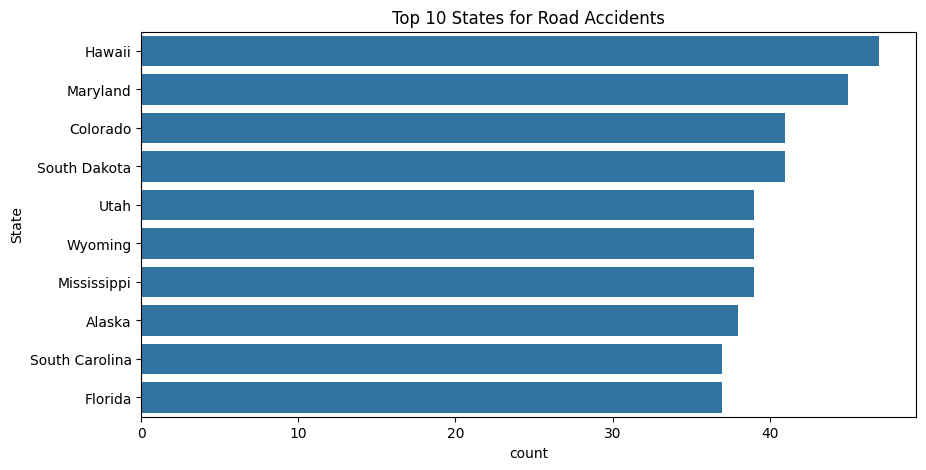

In [35]:
## Let's find out  Which states have the most accidents?


plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='State', order=df['State'].value_counts().index[:10])
plt.title('Top 10 States for Road Accidents')
plt.show()

In [ ]:
## Noticed

"""
By isolating the Top 10 states, I can clearly identify which regions are 'hotspots' for accidents in this dataset. This helps prioritize where safety interventions or further infrastructure studies are most needed.

The horizontal orientation allows for a clear ranking. If there is a large gap between the top state and the second state, it suggests either a significantly higher population or a potential bias in how accidents are reported in that specific region.



"""

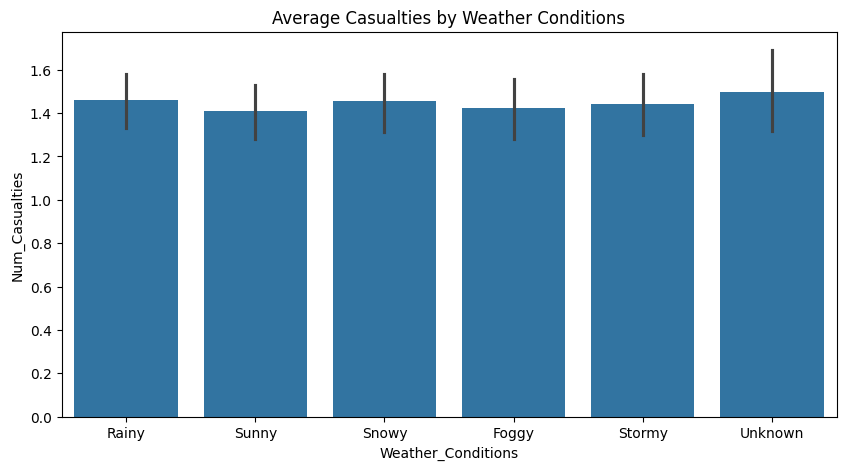

In [37]:
## Let's find out Does Weather conditions affect the number of casualties?

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Weather_Conditions', y='Num_Casualties')
plt.title('Average Casualties by Weather Conditions')
plt.show()

In [ ]:
## Discovery

"""
While we might expect 'Clear' or 'Sunny' days to be the safest, the bar chart reveals that the average number of casualties remains relatively consistent across all weather types. This suggests that while weather may cause more accidents, it doesn't necessarily make each individual accident more deadly.

"""

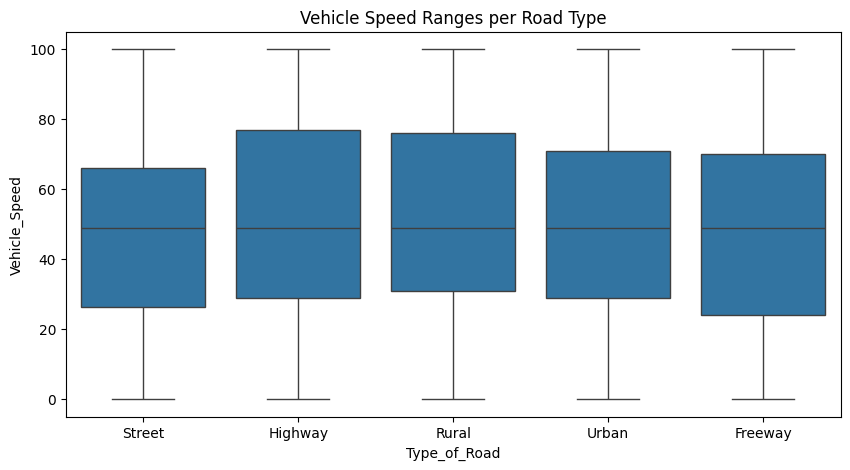

In [38]:
## Now, let's find out How speeding and road type are releated.

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Type_of_Road', y='Vehicle_Speed')
plt.title('Vehicle Speed Ranges per Road Type')
plt.show()

In [ ]:
## Noticed

"""
I notice that the median vehicle speed is significantly higher on Highways compared to Urban streets, which is expected. However, the median speed on Rural roads is surprisingly close to Highway speeds.

The 'box' for Streets is much shorter than the others. This indicates that speeds in urban areas are more consistent (likely due to traffic or stoplights), whereas Highway speeds have a much wider spread

"""

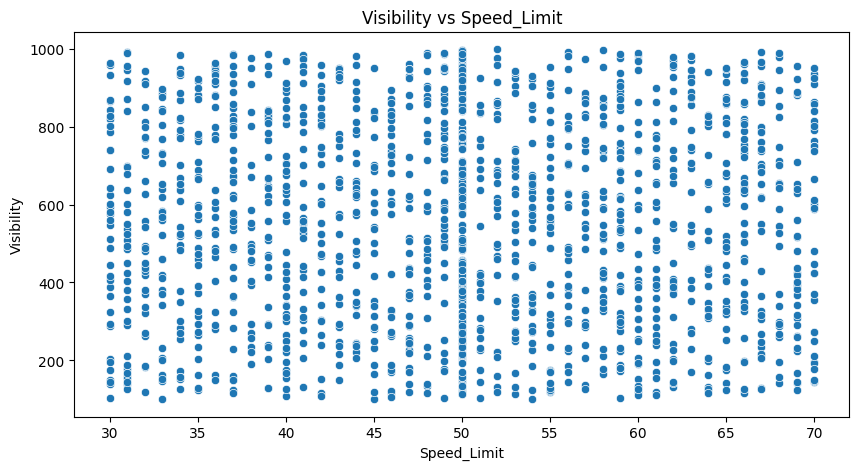

Correlation between Speed Limit and Visibility: -0.0118


'\n\n'

In [43]:
## Let's Find out relation  between Speed_Limit and Visibility.

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Speed_Limit', y='Visibility')
plt.title('Visibility vs Speed_Limit')
plt.show()


## Statistical Observation for the notes
Correlation = df['Speed_Limit'].corr(df['Visibility'])
print(f"Correlation between Speed Limit and Visibility: {Correlation:.4f}")


In [ ]:
## Noticed

"""
1. There is no strong correlation (r = -0.01$) between these two variables. This suggests that accidents happen at all visibility levels (from 100m to 1000m) regardless of how fast the road is legally designed to be.

2. The distribution is relatively uniform, indicating that visibility issues (like fog or heavy rain) are an 'equal opportunity' hazard across all types of roads in this dataset.


"""

In [47]:
from google.colab import drive
drive.mount('/content/drive')

## Saving in a drive
df.to_csv('/content/drive/My Drive/Cleaned_Data.csv', index=False)

Mounted at /content/drive
